<a href="https://colab.research.google.com/github/RajeshwariMankar/ML-Learning/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **the** **necessary** **libraries**

In [0]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import metrics

**Import** **the** **dataset**

In [0]:
iris = datasets.load_iris()
#print(iris)

**View the dataset**

In [0]:
#print(iris.data)
#print(iris.feature_names)
#print(iris.target)
#print(iris.target_names)

**Extract the features and corresponding classes**

In [5]:
# Store the inputs as a Pandas Dataframe 
x = pd.DataFrame(iris.data,columns=iris['feature_names'])
print(x.head())
 
y = pd.DataFrame(iris.target, columns=['target'])
print(y.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   target
0       0
1       0
2       0
3       0
4       0


**Obtain the actual class names which are encoded as integers**

In [6]:
# Map encoded target values to target names
def map_target(target_num):
    return iris.target_names[int(target_num)]

iris_target_name = y.apply(map_target, 1)
print(iris_target_name.head())

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object


**Visualize the data**

Text(0.5, 1.0, 'Petal')

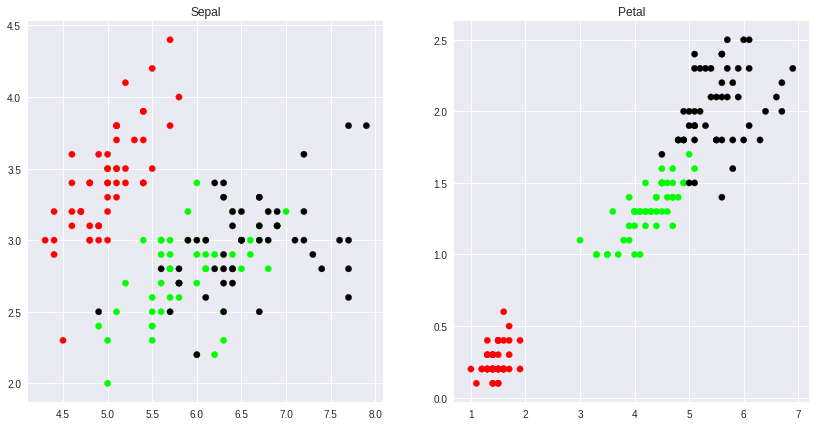

In [7]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x[['sepal length (cm)']], x[['sepal width (cm)']], c=colormap[y.target], s=40)
plt.title('Sepal')

# Plot Petal
plt.subplot(1, 2, 2)
plt.scatter(x[['petal length (cm)']], x[['petal width (cm)']], c=colormap[y.target], s=40)
plt.title('Petal')

**Elbow method to find optimum number of clusters**

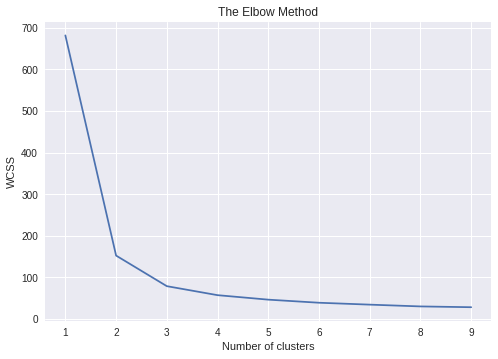

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
    #print(kmeans)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Select three as number of clusters and build the KMeans model **

In [9]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**Classes that the model decided**

In [10]:
# This is what KMeans thought
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**Visualize the classifier results (plot the actual classes against predicted classes from the model )**

> Ignore the colours as the model is unsupervised , it did not know which label (class 0, 1 or 2) to assign to each class.



No handles with labels found to put in legend.


Text(0.5, 1.0, 'K Mean Classification')

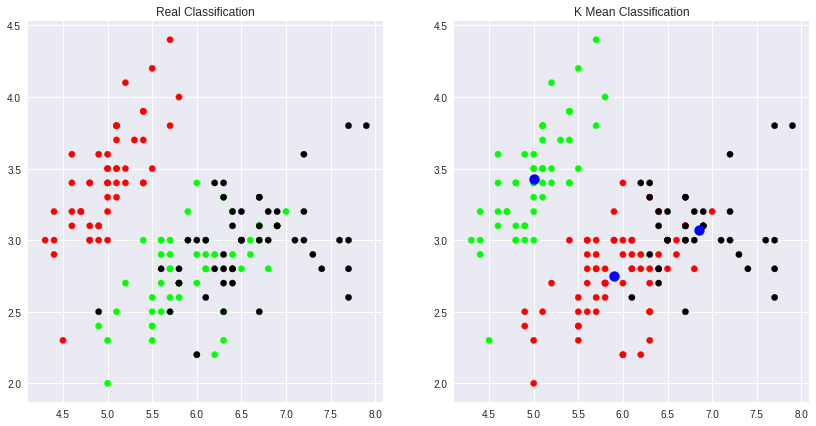

In [13]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x[['sepal length (cm)']], x[['sepal width (cm)']], c=colormap[y.target], s=40)

plt.title('Real Classification')
plt.legend()
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x[['sepal length (cm)']], x[['sepal width (cm)']], c=colormap[model.labels_], s=40)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'centroid')
plt.title('K Mean Classification')

**The Fix**

> Change the class labels, we are not changing any of the classification groups we are simply giving each group the correct number. We need to do this for measuring the performance.



In [16]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (model.labels_)
print (predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


**Re-plot (plot the data as before but using predY instead of model.labels_)**

> Here, we can see that the K Means classifier has identified one class correctly (red) but some greens have been classed as blacks.



Text(0.5, 1.0, 'K Mean Classification')

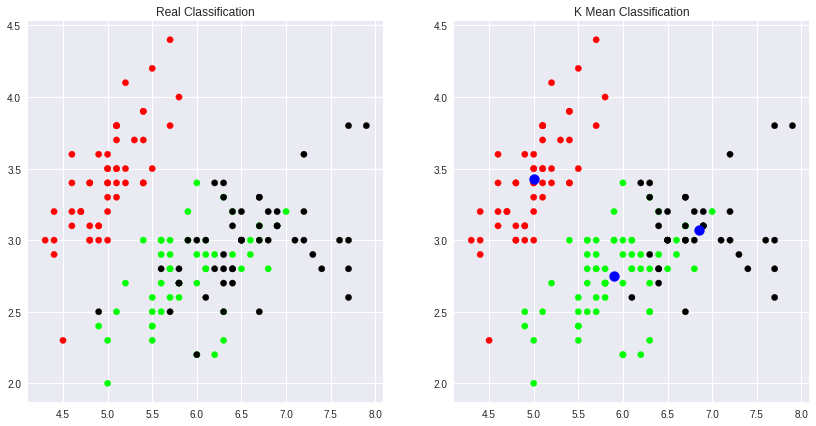

In [17]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x[['sepal length (cm)']], x[['sepal width (cm)']], c=colormap[y.target], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x[['sepal length (cm)']], x[['sepal width (cm)']], c=colormap[predY], s=40)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'centroid')
plt.title('K Mean Classification')

**Performance Measures**

In [18]:
# Calculate accuracy
sm.accuracy_score(y, predY)

0.8933333333333333

In [19]:
# Confusion Matrix
sm.confusion_matrix(y, predY)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])